# 图像的几何变换

**本文档中的坐标系与PPT中的有所不同，为了与矩阵统一，方便起见，坐标系定义如下**
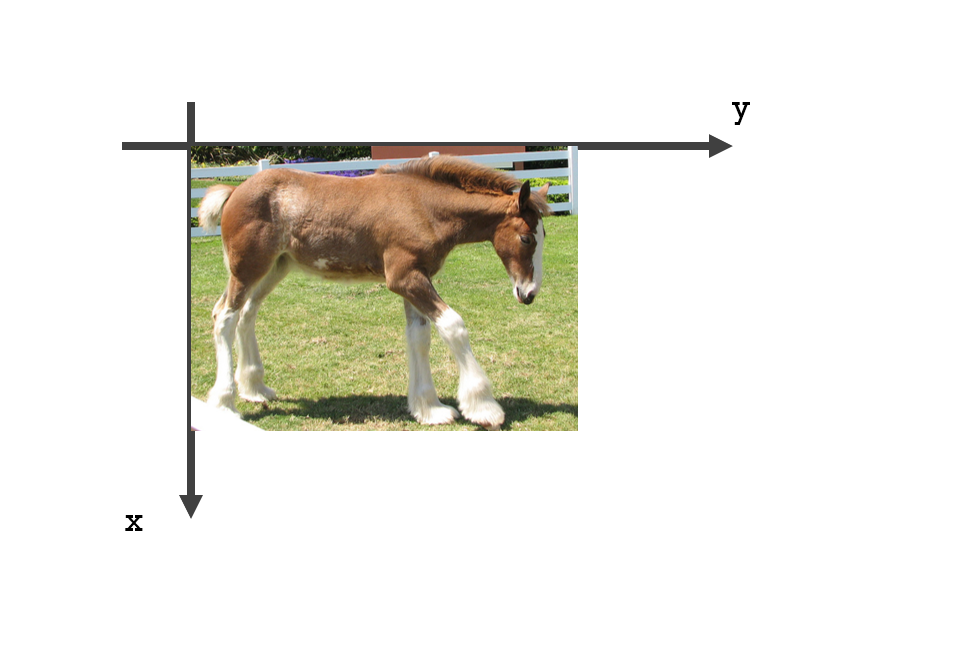

**在opencv等图像处理过程中，通用的坐标系与这个坐标系的xy轴互换，但是在那个时候，矩阵中的索引[i,j]就为[y,x]，请自行思考**

In [10]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

## 定义插值方法 

In [2]:
def nearest_interpolation(img_ori:'原始图像',pos_ori:'坐标'):
    h,w,c = img_ori.shape
    center_x,center_y = pos_ori[0],pos_ori[1]
    x,y = round(center_x),round(center_y)
    if x in range(h) and y in range(w):
        return img_ori[x,y]
    else:
        return np.zeros((3,),dtype = "uint8")

In [5]:
def bilinear_interpolation(img_ori:'原始图像',pos_ori:'坐标'):
    h,w,c = img_ori.shape
    center_x,center_y = pos_ori
    x0 = int(center_x)
    x1 = x0 + 1
    y0 = int(center_y)
    y1 = y0 + 1
    if x1 in range(h) and y1 in range(w):
        temp1 = (center_y-y0)*img_ori[x1,y1]+(y1-center_y)*img_ori[x1,y0]
        temp2 = (center_y-y0)*img_ori[x0,y1]+(y1-center_y)*img_ori[x0,y0]
        return (center_x-x0)*temp1 +(x1-center_x)*temp2
    else:
        return np.zeros((3,),dtype = "uint8")

In [6]:
img = Image.open("../img/horse.jpg") 
img_np = np.array(img)

In [9]:
img_np.shape

(376, 500, 3)

## 定义图像几何变换通用函数

In [8]:
def geo_translation(image,trans_mat,interpolation_method="b"):
    '''
    该方法为反算方法，即从转换后图像反算转换前图像的坐标并插值
    image:输入图像，格式为numpy数组
    trans_mat: 图像变换矩阵，是正变换的逆矩阵
    interpolation_method:"插值方法"
    '''
    h,w,c = image.shape
    img_trans = np.zeros(image.shape,dtype = "uint8")
    for i in range(h):
        for j in range(w):
            pos = np.array([i,j,1],dtype = np.float) #逐像素反算
            pos_ori = np.dot(trans_mat,pos)#求解原图坐标
            if interpolation_method == 'b':
                img_trans[i,j] = bilinear_interpolation(image,pos_ori[:2])
            elif interpolation_method == "n":
                img_trans[i,j] = nearest_interpolation(image,pos_ori[:2])
    return img_trans

## 平移

In [29]:
trans_mat = np.array([[1,0,100],
                      [0,1,100],
                      [0,0,1]])
trans_mat_inv = np.linalg.inv(trans_mat)

In [30]:
img2 = geo_translation(img_np,trans_mat_inv,"b")

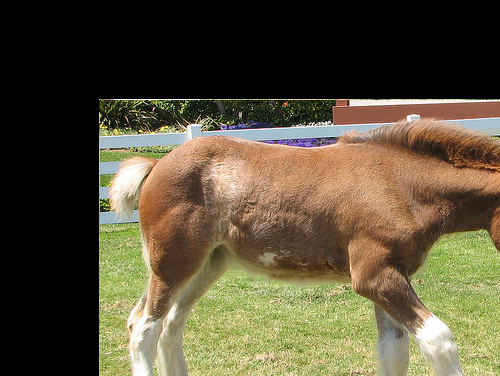

In [31]:
Image.fromarray(img2)

## 缩放

In [25]:
trans_mat = np.array([[3,0,0],
                      [0,3,0],
                      [0,0,1]])
trans_mat_inv = np.linalg.inv(trans_mat)

In [28]:
img3 = geo_translation(img_np,trans_mat_inv,"b")

<ipython-input-8-07cdb34e7d29>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pos = np.array([i,j,1],dtype = np.float) #逐像素反算


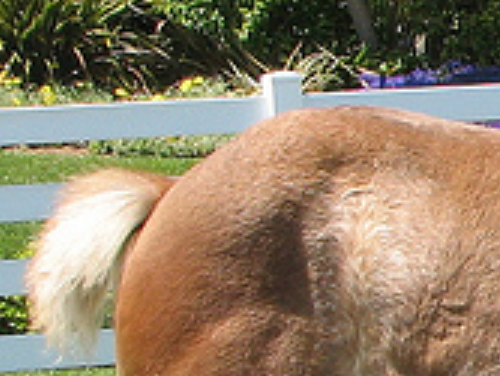

In [29]:
Image.fromarray(img3)

## 旋转

In [30]:
#原点为中心的旋转
theta = math.pi*-60/180
trans_mat = np.array([[math.cos(theta),math.sin(theta),0],
                      [-math.sin(theta),math.cos(theta),0],
                      [0,0,1]])
trans_mat_inv = np.linalg.inv(trans_mat)

In [31]:
img4 = geo_translation(img_np,trans_mat_inv,"b")

<ipython-input-8-07cdb34e7d29>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pos = np.array([i,j,1],dtype = np.float) #逐像素反算


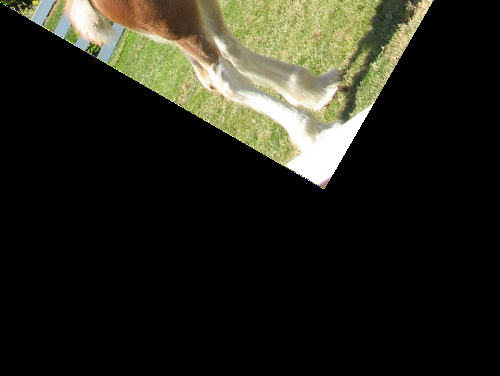

In [32]:
Image.fromarray(img4)

## 镜像

In [11]:
#垂直镜像
trans_mat = np.array([[-1,0,img_np.shape[0]],
                      [0,1,0],
                      [0,0,1]])
trans_mat_inv = np.linalg.inv(trans_mat)

In [12]:
img5 = geo_translation(img_np,trans_mat_inv,"n")

<ipython-input-8-07cdb34e7d29>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pos = np.array([i,j,1],dtype = np.float) #逐像素反算


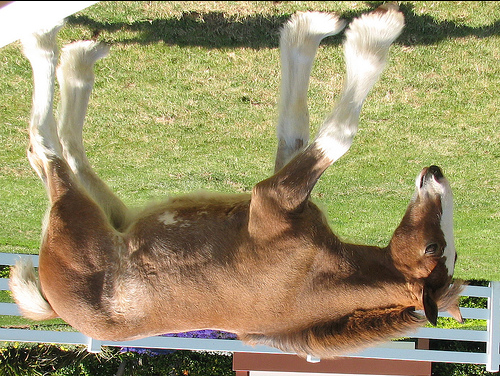

In [13]:
Image.fromarray(img5)

In [17]:
#水平
trans_mat = np.array([[1,0,0],
                      [0,-1,img_np.shape[1]-50],
                      [0,0,1]])
trans_mat_inv = np.linalg.inv(trans_mat)

In [18]:
img6 = geo_translation(img_np,trans_mat_inv,"n")

<ipython-input-8-07cdb34e7d29>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pos = np.array([i,j,1],dtype = np.float) #逐像素反算


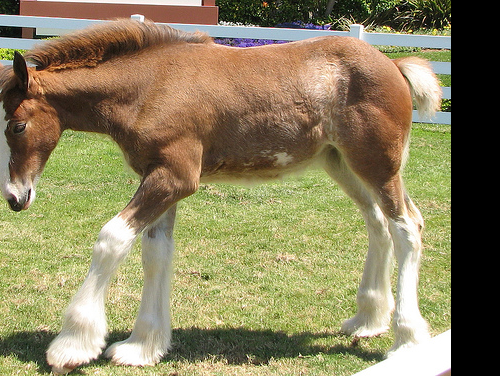

In [19]:
Image.fromarray(img6)